# Project 44: Simulating the Izhikevich spiking neuron model using the Brian2 software

## Authors: Julen Etxaniz and Ibon Urbina

## Subject: Machine Learning and Neural Networks

## Date: 22/11/2020

## Objective: The goal of the project is to implement the Izhikevich’s model using the Brian2 Python library https://brian2.readthedocs.io/en/stable/.

## Contents:
### 1. Importing the libraries
### 2. Defining the model
### 3. Interacting with the model
### 4. Neuron Types
### 5. Neuron Features
### 6. Defining the simulation
### 7. Running the simulation

# 1. Importing the libraries

In [1]:
%matplotlib inline
from brian2 import *
import ipywidgets as ipw

# 2. Defining the model
https://www.izhikevich.org/publications/spikes.htm

<figure>
  <img src="model.png" alt="Neuron Model">
  <figcaption>Figure 1. Neuron Model. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

In [285]:
# Define default values for the parameters
def model(a=0.02, b=0.2, c=-65, d=2, fI='int(t>100*ms)*10', V=-65, tau=1/0.1, duration=2000):
    # Parameters
    tau = tau*ms
    duration = duration*ms
    
    # Simulation
    # Add int(t>duration/10) to make v and u constant at the start when I=0
    eqs = '''
    dv/dt = int(t>duration/10)*(0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = int(t>duration/10)*(a*(b*v-u))/tau : 1
    I : 1
    '''
    # Create a NeuronGroup with one neuron using previous equations
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    # Set initial values of v and u
    G.v = V
    G.u = b*V
    
    # Create a monitor to record v, u and I values
    M = StateMonitor(G, ('v', 'u', 'I'), record=0)
    
    # Set I value every 1*ms with the parameter function fI
    @network_operation(dt=1*ms)
    def change_I():
        G.I = fI
    
    # Run the simulation for duration time
    run(duration)
   
    # Plotting
    plot(M.t/ms, M.v[0], label='v')
    plot(M.t/ms, M.u[0], label='u')
    plot(M.t/ms, M.I[0], label='I')
    axhline(30, ls='-', c='C3', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v, u, I')
    legend()

# 3. Interacting with the model

In [3]:
layout = ipw.Layout(width='100%')
style = {'description_width': 'initial'}
ipw.interact(model,
             a=ipw.FloatSlider(value=0.02, min=0.02, max=0.1, step=0.01, continuous_update=False,
                             description="a: time scale of the recovery variable u", style=style, layout=layout),
             b=ipw.FloatSlider(value=0.2, min=0.2, max=0.26, step=0.01, continuous_update=False,
                             description="b: sensitivity of the recovery variable u to the subthreshold fluctuations of the membrane potential v", style=style, layout=layout),
             c=ipw.IntSlider(value=-65, min=-65, max=-50, step=1, continuous_update=False,
                             description="c: after-spike reset value of the membrane potential v", style=style, layout=layout),
             d=ipw.FloatSlider(value=2, min=2, max=8, step=0.1, continuous_update=False,
                             description="d: after-spike reset of the recovery variable u", style=style, layout=layout),
             fI=ipw.Text(value='int(t/ms>200)*10', continuous_update=False,
                             description="fI: injected dc-current function", style=style, layout=layout),
             V=ipw.FloatSlider(value=-65, min=-87, max=-50, step=1, continuous_update=False,
                             description="V: initial membrane potential v", style=style, layout=layout),
             tau=ipw.FloatSlider(value=10, min=1, max=100, step=1, continuous_update=False,
                             description="tau: time resolution", style=style, layout=layout),
             duration=ipw.IntSlider(value=2000, min=100, max=4000, step=1, continuous_update=False,
                             description="duration: length of the simulation", style=style, layout=layout),
             );

interactive(children=(FloatSlider(value=0.02, continuous_update=False, description='a: time scale of the recov…

# 4. Neuron Types
https://www.izhikevich.org/publications/spikes.htm

<figure>
  <img src="types.png" alt="Neuron Types">
  <figcaption>Figure 2. Neuron Types. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

## 4.1. Excitatory

### 4.1.1. Regular Spiking (RS)

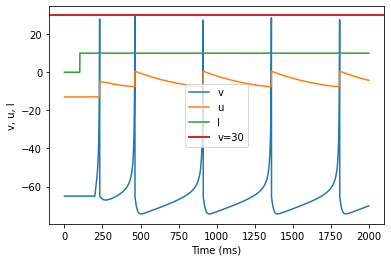

In [286]:
model(d=8)

### 4.1.2. Intrinsically Bursting (IB)

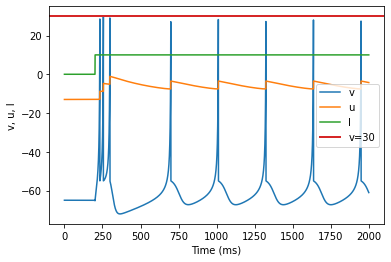

In [5]:
model(c=-55, d=4)

### 4.1.3. Chattering (CH)

300. us


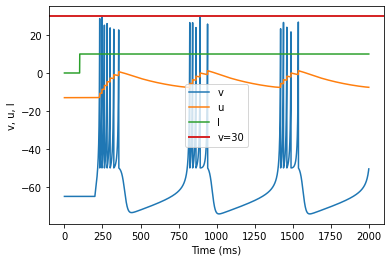

In [282]:
model(c=-50)

## 4.2. Inhibitory

### 4.2.1. Fast Spiking (FS)

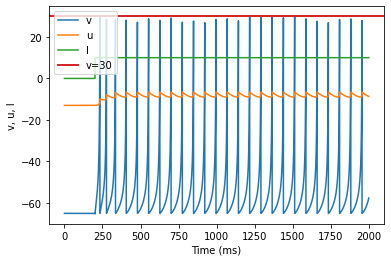

In [7]:
model(a=0.1)

### 4.2.2. Low-Thershold Spiking (LTS)

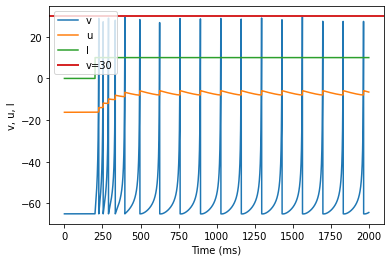

In [8]:
model(b=0.25)

## 4.3. Others
These are not working as expected

### 4.3.1 Thalamo-Cortical (TC)

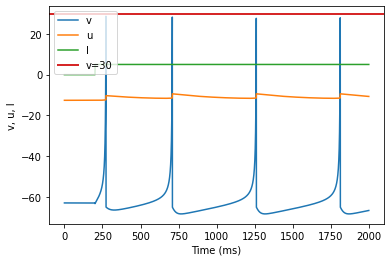

In [9]:
model(fI='int(t>200*ms)*5', V=-63)

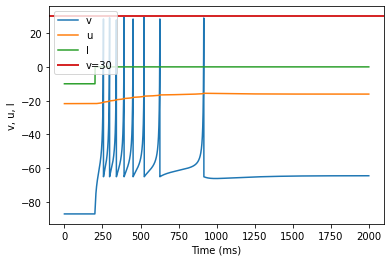

In [10]:
model(b=0.25, d=0.05, fI='int(t<=200*ms)*-10', V=-87)

### 4.3.2 Resonator (RZ)

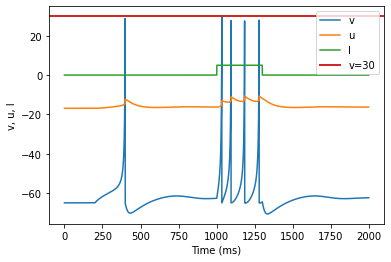

In [311]:
# The resonator is not working as intended
model(a=0.1, b=0.26, fI='int(t>200*ms)*0.01 + int(t<=200*ms)*0 + int(t>1000*ms and t<1300*ms)*5')

# 5. Neuron Features
https://www.izhikevich.org/publications/whichmod.htm

https://www.izhikevich.org/publications/figure1.m

<figure>
  <img src="features.png" alt="Neuron Features">
  <figcaption>Figure 3. Neuron Features. Electronic version of the figure and reproduction permissions are freely available at <a href="http://www.izhikevich.com">http://www.izhikevich.com</a></figcaption>
</figure>

## 5.1. (A) Tonic Spiking

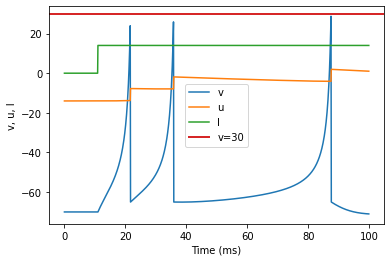

In [48]:
# Original parameters
model(d=6, fI='int(t>10*ms)*14', V=-70, tau=1/0.25, duration=100)

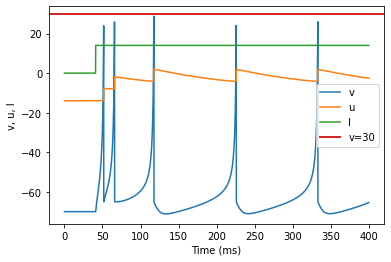

In [52]:
# Adjusted parameters
model(d=6, fI='int(t>40*ms)*14', V=-70, tau=1/0.25, duration=400)

## 5.2. (B) Phasic Spiking

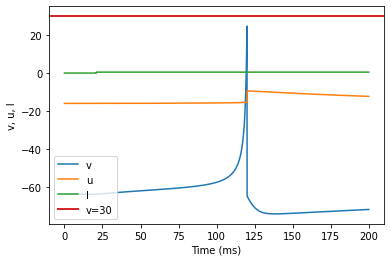

In [53]:
# Original parameters
model(b=0.25, d=6, fI='int(t>20*ms)*0.5', V=-64, tau=1/0.25, duration=200)

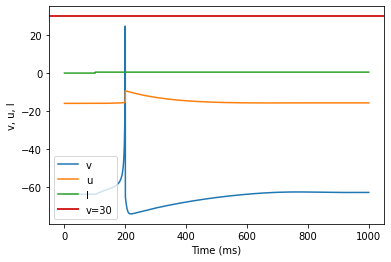

In [54]:
# Adjusted parameters
model(b=0.25, d=6, fI='int(t>100*ms)*0.5', V=-64, tau=1/0.25, duration=1000)

## 5.3. (C) Tonic Bursting

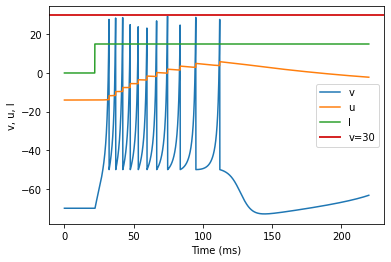

In [55]:
# Original parameters
model(c=-50, fI='int(t>22*ms)*15', V=-70, tau=1/0.25, duration=220)

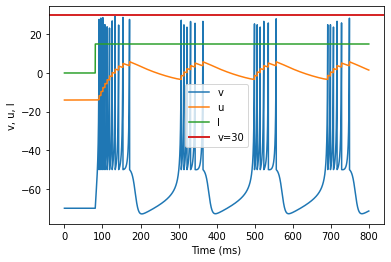

In [58]:
# Adjusted parameters
model(c=-50, fI='int(t>80*ms)*15', V=-70, tau=1/0.25, duration=800)

## 5.4. (D) Phasic Bursting

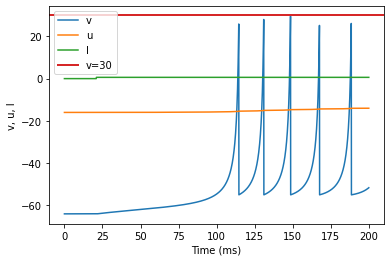

In [59]:
# Original parameters
model(b=0.25, c=-55, d=0.05, fI='int(t>20*ms)*0.6', V=-64, tau=1/0.2, duration=200)

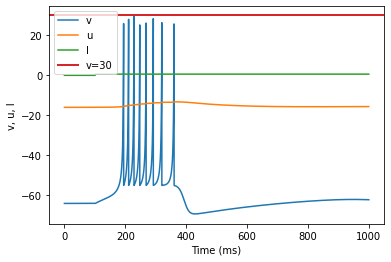

In [60]:
# Adjusted parameters
model(b=0.25, c=-55, d=0.05, fI='int(t>100*ms)*0.6', V=-64, tau=1/0.2, duration=1000)

## 5.5. (E) Mixed Mode

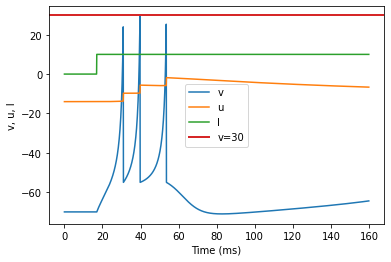

In [61]:
# Original parameters
model(c=-55, d=4, fI='int(t>16*ms)*10', V=-70, tau=1/0.25, duration=160)

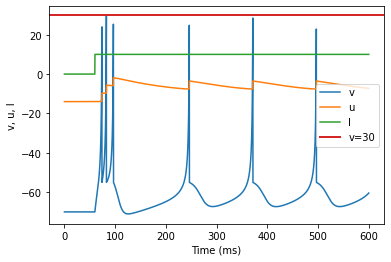

In [63]:
# Adjusted parameters
model(c=-55, d=4, fI='int(t>60*ms)*10', V=-70, tau=1/0.25, duration=600)

## 5.6. (F) Spike Frequency Adaptation

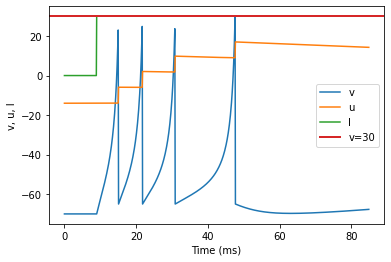

In [64]:
# Original parameters
model(a=0.01, d=8, fI='int(t>8.5*ms)*30', V=-70, tau=1/0.25, duration=85)

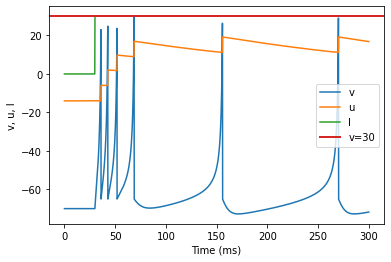

In [66]:
# Adjusted parameters
model(a=0.01, d=8, fI='int(t>30*ms)*30', V=-70, tau=1/0.25, duration=300)

## 5.7. (G) Class 1 Excitable


In [69]:
# The original model is changed: (0.04*V^2+4.1*V+108-u+I) it will be necessary to copy it
def model2(a=0.02, b=0.2, c=-65, d=2, fI='int(t>200*ms)*10', V=-65, tau=1/0.1, duration=2000):
    # Parameters
    tau = tau*ms
    duration = duration*ms
    
    # Simulation
    # We added int(t>duration/10) to make v and u constant at the start when I=0
    eqs = '''
    dv/dt = int(t>duration/10)*(0.04*v**2+4.1*v+108-u+I)/tau : 1
    du/dt = int(t>duration/10)*(a*(b*v-u))/tau : 1
    I : 1
    '''
    # Create a NeuronGroup with one neuron using previous equations
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    # Set initial values of v and u
    G.v = V
    G.u = b*V
    
    # Create a monitor to record v, u and I values
    M = StateMonitor(G, ('v', 'u', 'I'), record=0)
    
    # Set I value every 1*ms with the parameter function fI
    @network_operation(dt=1*ms)
    def change_I():
        G.I = fI
    
    # Run the simulation for duration time
    run(duration)
   
    # Plotting
    plot(M.t/ms, M.v[0], label='v')
    plot(M.t/ms, M.u[0], label='u')
    plot(M.t/ms, M.I[0], label='I')
    axhline(30, ls='-', c='C3', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v, u, I')
    legend()

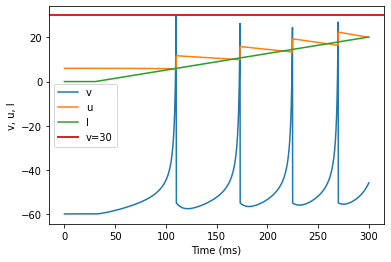

In [70]:
# Original parameters
model2(b=-0.1, c=-55, d=6, fI='int(t>30*ms)*0.075*(t/ms-30)', V=-60, tau=1/0.25, duration=300)

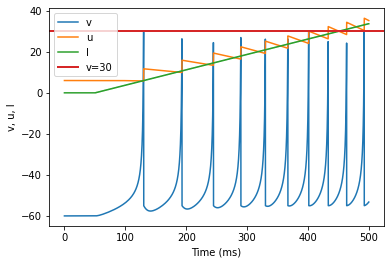

In [71]:
# Adjusted parameters
model2(b=-0.1, c=-55, d=6, fI='int(t>50*ms)*0.075*(t/ms-50)', V=-60, tau=1/0.25, duration=500)

## 5.8. (H) Class 2 Excitable

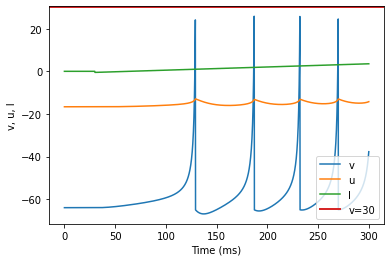

In [73]:
# Original parameters
model(a=0.2, b=0.26, d=0, fI='int(t>30*ms)*(-0.5+0.015*(t/ms-30))', V=-64, tau=1/0.25, duration=300)

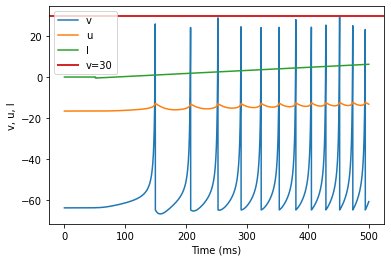

In [74]:
# Adjusted parameters
model(a=0.2, b=0.26, d=0, fI='int(t>50*ms)*(-0.5+0.015*(t/ms-50))', V=-64, tau=1/0.25, duration=500)

## 5.9. (I) Spike Latency

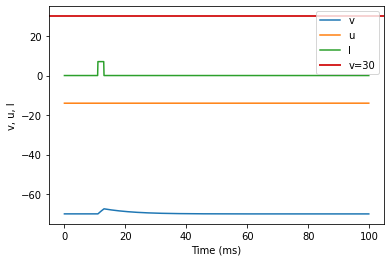

In [81]:
# Original parameters
model(d=6, fI='int(t>10*ms and t<13*ms)*7.04', V=-70, tau=1/0.2, duration=100)

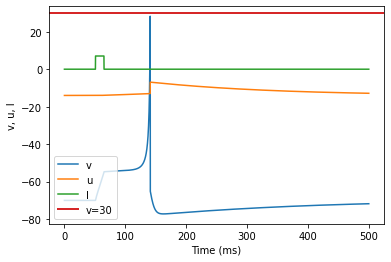

In [85]:
# Adjusted parameters
model(d=6, fI='int(t>50*ms and t<65*ms)*7.04', V=-70, tau=1/0.2, duration=500)

## 5.10. (J) Subthreshold Oscillations

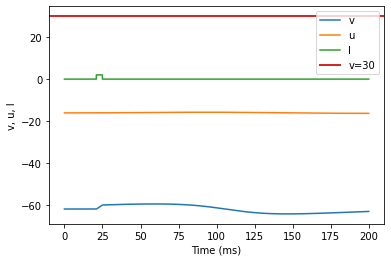

In [86]:
# Original parameters
model(a=0.05, b=0.26, c=-60, d=0, fI='int(t>20*ms and t<25*ms)*2', V=-62, tau=1/0.25, duration=200)

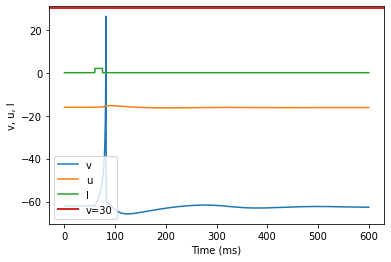

In [92]:
# Adjusted parameters
model(a=0.05, b=0.26, c=-60, d=0, fI='int(t>60*ms and t<75*ms)*2', V=-62, tau=1/0.25, duration=600)

## 5.11. (K) Resonator

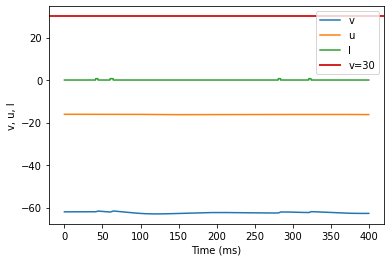

In [93]:
# Original parameters
model(a=0.1, b=0.26, c=-60, d=-1, fI='int(t>40*ms and t<44*ms or t>60*ms and t<64*ms or t>280*ms and t<284*ms or t>320*ms and t<324*ms)*0.65', V=-62, tau=1/0.25, duration=400)

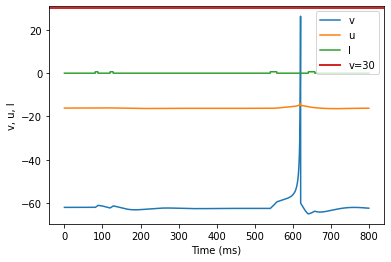

In [111]:
# Adjusted parameters
# Needs adjusting
model(a=0.1, b=0.26, c=-60, d=-1, fI='int(t>80*ms and t<88*ms or t>120*ms and t<128*ms or t>540*ms and t<558*ms or t>640*ms and t<658*ms)*0.65', V=-62, tau=1/0.25, duration=800)

## 5.12. (L) Integrator

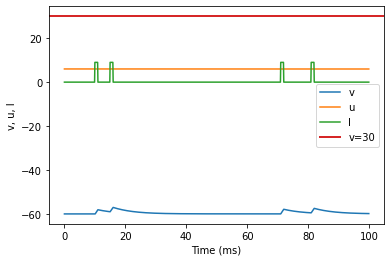

In [113]:
# Original parameters
model2(b=-0.1, c=-55, d=6, fI='int(t>9*ms and t<11*ms or t>14*ms and t<16*ms or t>70*ms and t<72*ms or t>80*ms and t<82*ms)*9', V=-60, tau=1/0.25, duration=100)

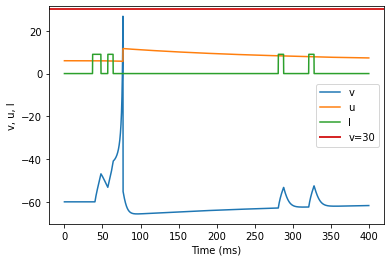

In [119]:
# Adjusted parameters
model2(b=-0.1, c=-55, d=6, fI='int(t>36*ms and t<48*ms or t>56*ms and t<64*ms or t>280*ms and t<288*ms or t>320*ms and t<328*ms)*9', V=-60, tau=1/0.25, duration=400)

## 5.13. (M) Rebound Spike

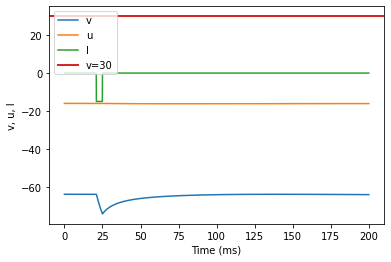

In [123]:
# Original parameters
model(a=0.03, b=0.25, c=-60, d=4, fI='int(t>20*ms and t<25*ms)*-15', V=-64, tau=1/0.2, duration=200)

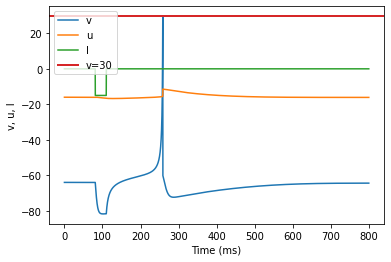

In [139]:
# Adjusted parameters
model(a=0.03, b=0.25, c=-60, d=4, fI='int(t>80*ms and t<110*ms)*-15', V=-64, tau=1/0.2, duration=800)

## 5.14. (N) Rebound Burst

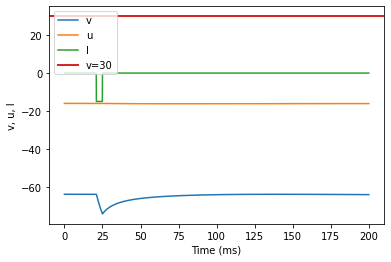

In [142]:
# Original parameters
model(a=0.03, b=0.25, c=-52, d=0, fI='int(t>20*ms and t<25*ms)*-15', V=-64, tau=1/0.2, duration=200)

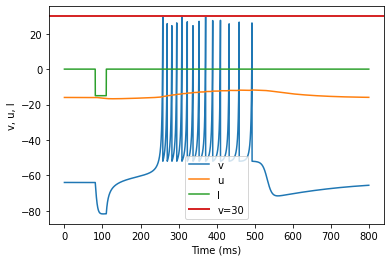

In [141]:
# Adjusted parameters
model(a=0.03, b=0.25, c=-52, d=0, fI='int(t>80*ms and t<110*ms)*-15', V=-64, tau=1/0.2, duration=800)

## 5.15. (O) Threshold variability

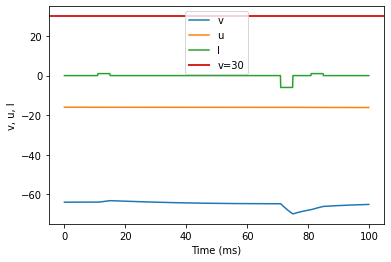

In [144]:
# Original parameters
model(a=0.03, b=0.25, c=-60, d=4, fI='int(t>10*ms and t<15*ms or t>80*ms and t<85*ms)*1 + int(t>70*ms and t<75*ms)*-6', V=-64, tau=1/0.25, duration=100)

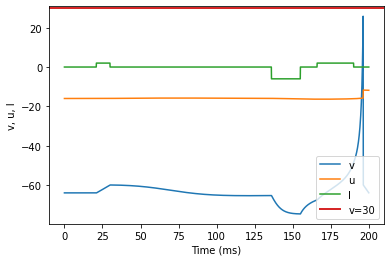

In [163]:
# Adjusted parameters
# Needs adjusting: Fist and third I have to be the same length
model(a=0.03, b=0.25, c=-60, d=4, fI='int(t>20*ms and t<30*ms or t>165*ms and t<190*ms)*2 + int(t>135*ms and t<155*ms)*-6', V=-64, tau=1/0.25, duration=200)

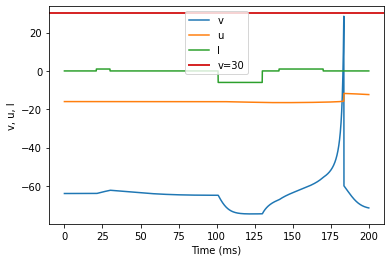

In [165]:
# Adjusted parameters
# Needs adjusting: Fist and third I have to be the same length
model(a=0.03, b=0.25, c=-60, d=4, fI='int(t>20*ms and t<30*ms or t>140*ms and t<170*ms)*1 + int(t>100*ms and t<130*ms)*-6', V=-64, tau=1/0.25, duration=200)

## 5.16. (P) Bistability

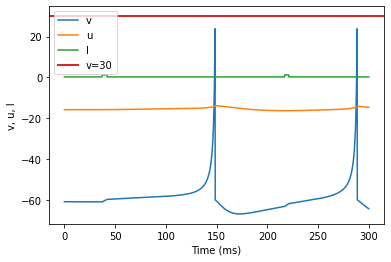

In [166]:
# Original parameters
model(a=0.1, b=0.26, c=-60, d=0, fI='int(t>37*ms and t<42*ms or t>216*ms and t<221*ms)*1.24 + int(t<=37*ms or t>=42*ms and t<=216*ms or t>=221*ms)*0.24', V=-61, tau=1/0.25, duration=300)

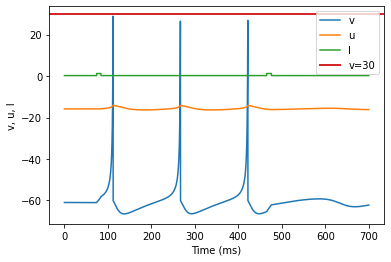

In [178]:
# Adjusted parameters
model(a=0.1, b=0.26, c=-60, d=0, fI='int(t>74*ms and t<84*ms or t>464*ms and t<476*ms)*1.24 + int(t<=74*ms or t>=84*ms and t<=464*ms or t>=476*ms)*0.24', V=-61, tau=1/0.25, duration=700)

## 5.17. (Q) Depolarizing After-Potential

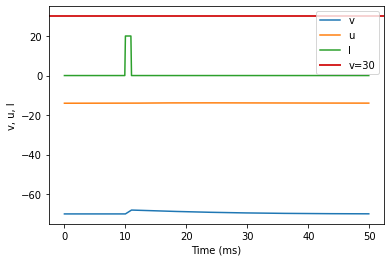

In [180]:
# Original parameters
model(a=1, c=-60, d=-21, fI='int(t>9*ms and t<11*ms)*20', V=-70, tau=1/0.1, duration=50)

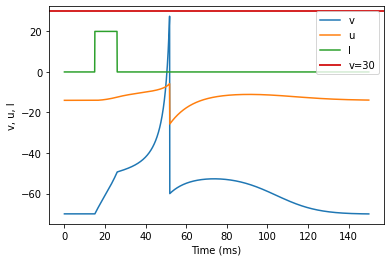

In [215]:
# Original parameters
model(a=1, c=-60, d=-20, fI='int(t>15*ms and t<26*ms)*20', V=-70, tau=1/0.1, duration=150)

## 5.18. (R) Accomodation

In [276]:
# The model has to be changed to set u=-16 amd remove v and
def model3(a=0.02, b=0.2, c=-65, d=2, fI='int(t>100*ms)*10', V=-65, tau=0.1, duration=2000):
    # Parameters
    # Test changing dt
    defaultclock.dt = tau*ms
    tau = tau/ms
    duration = duration*ms
    
    print(defaultclock.dt)
    
    # Simulation
    # Remove int(t>duration/10) to update u and v from the start
    eqs = '''
    dv/dt = (0.04*v**2+5*v+140-u+I)*tau : 1
    du/dt = (a*(b*v-u))*tau : 1
    I : 1
    '''
    # Create a NeuronGroup with one neuron using previous equations
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    # Set initial values of v and u
    G.v = V
    G.u = -16
    
    # Create a monitor to record v, u and I values
    M = StateMonitor(G, ('v', 'u', 'I'), record=0)
    
    # Set I value every 1*ms with the parameter function fI
    @network_operation(dt=1*ms)
    def change_I():
        G.I = fI
    
    # Run the simulation for duration time
    run(duration)
   
    # Plotting
    plot(M.t/ms, M.v[0], label='v')
    plot(M.t/ms, M.u[0], label='u')
    plot(M.t/ms, M.I[0], label='I')
    axhline(30, ls='-', c='C3', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v, u, I')
    legend()

300. us


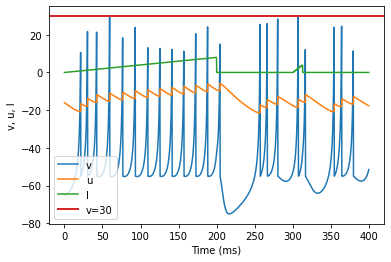

In [279]:
# Original parameters
model3(b=1, c=-55, d=4, fI='int(t<200*ms)*t/ms/25 + int(t>=300*ms and t<312.5*ms)*(t/ms-300)/12.5*4', V=-65, tau=0.5, duration=400)

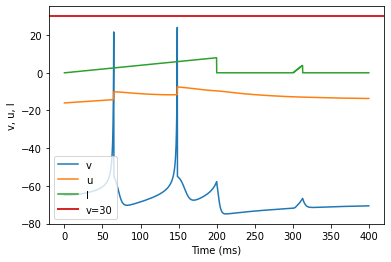

In [234]:
# Adjusted parameters
# Needs adjusting
model3(b=0.2, c=-55, d=4, fI='int(t<200*ms)*t/ms/25 + int(t>=300*ms and t<312.5*ms)*((t/ms-300)/12.5*4)', V=-65, tau=0.5, duration=400)

## 5.19. (S) Inhibition Induced Spiking

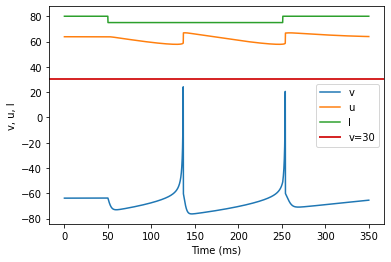

In [287]:
# Original parameters
model(a=-0.02, b=-1, c=-60, d=8, fI='int(t<50*ms or t>250*ms)*80 + int(t>=50*ms and t<=250*ms)*75', V=-63.8, tau=1/0.5, duration=350)

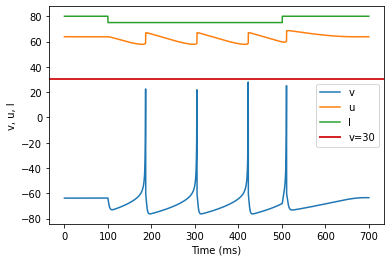

In [288]:
# Adjusted parameters
model(a=-0.02, b=-1, c=-60, d=8, fI='int(t<100*ms or t>500*ms)*80 + int(t>=100*ms and t<=500*ms)*75', V=-63.8, tau=1/0.5, duration=500)

## 5.20. (T) Inhibition Induced Bursting

In [296]:
# Define default values for the parameters
def model4(a=0.02, b=0.2, c=-65, d=2, fI='int(t>100*ms)*10', V=-65, tau=1/0.1, duration=2000):
    # Parameters
    tau = tau*ms
    duration = duration*ms
    
    # Simulation
    # Add int(t>duration/10) to make v and u constant at the start when I=0
    eqs = '''
    dv/dt = int(t>duration/10)*(0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = int(t>duration/10)*(a*(b*v-u))/tau : 1
    I : 1
    '''
    # Create a NeuronGroup with one neuron using previous equations
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    # Set initial values of v and u
    G.v = V
    G.u = b*V
    
    # Create a monitor to record v, u and I values
    M = StateMonitor(G, ('v', 'u', 'I'), record=0)
    
    # Set I value every 1*ms with the parameter function fI
    @network_operation(dt=1*ms)
    def change_I():
        G.I = fI
    
    # Run the simulation for duration time
    run(duration)
   
    # Plotting
    plot(M.t/ms, M.v[0], label='v')
    #plot(M.t/ms, M.u[0], label='u')
    plot(M.t/ms, M.I[0], label='I', c='C2')
    axhline(30, ls='-', c='C3', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v, u, I')
    legend()

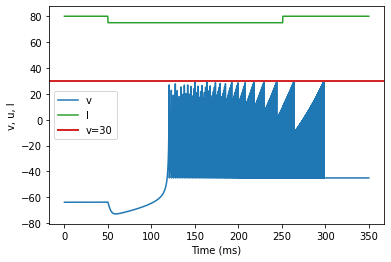

In [299]:
# Original model not working as expected. u has to be removed for visualization
model4(a=-0.026, b=-1, c=-45, d=-2, fI='int(t<50*ms or t>250*ms)*80 + int(t>=50*ms and t<=250*ms)*75', V=-63.8, tau=1/0.5, duration=350)

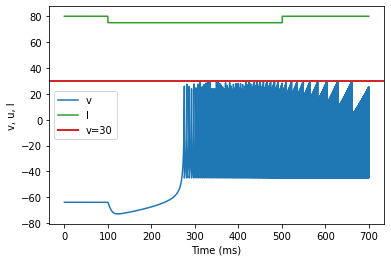

In [307]:
# Adjusted parameters
model4(a=-0.026, b=-1, c=-45, d=-2, fI='int(t<100*ms or t>500*ms)*80 + int(t>=100*ms and t<=500*ms)*75', V=-63.8, tau=1/0.2, duration=700)

## 5.21. (U) Chaos

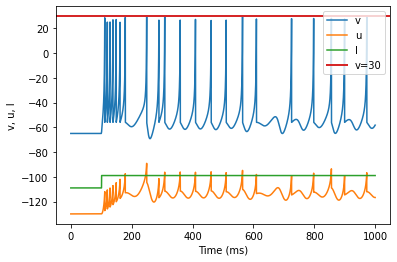

In [33]:
model(a=0.2, b=2, c=-56, d=-16, fI='int(t>100*ms)*-99 + int(t<=100*ms)*-109', tau=1/0.2, duration=1000)

# 6. Defining the simulation
https://www.izhikevich.org/publications/net.m

<figure>
  <img src="simulation.png" alt="Simulation">
  <figcaption>Figure 3. Simulation</figcaption>
</figure>

In [34]:
def simulation(Ne=800, Ni=200, tau=1, duration=1000):
    
    # Variables:
        # Ne: excitatory neurons quantity.
        # Ni: inhibitory neurons quantity.
        # tau: dv/dt and du/dt equations correspond to the change in a concrete time interval 
        #      that variables v and u suffer. This concrete time interval is defined by the value tau.
        # duration: defines the duration of the simulation.
            
    tau = tau*ms
    duration = duration*ms
    
    # Two behaviour differential equations:
    #    1) dv/dt: represents the membrane potential evolution during time.
    #    2) du/dt: represents the membrane recovery variable evolution during time.
    
    # Independient variables:
    #    1) I: represents the input current.
    #    2) v: represents the membrane potential of the neuron.
    #    3) u: represents a membrane recovery variable which provides negative feedback to v. This feedback
    #          is caused due to activation of K+ ionic currents and inactivation of Na+ ionic currents.
    #    4) tau: time interval
    #    5) a: describes the time scale of the recovery variable u.
    #    6) b: describes the sensitivity of the recovery variable u to the subthreshold fluctuations
    #          of the membrane potential v.
    #    7) c: describes the after-spike reset value of the membrane potential v.
    #    8) d: describes after-spike reset of the recovery variable u.
    
    eqs = '''
    dv/dt = (0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = (a*(b*v-u))/tau : 1
    I : 1
    a : 1
    b : 1
    c : 1
    d : 1
    '''
    
    # Excitatory neurons group network. Quantity of Ne (800)
    Ge = NeuronGroup(Ne, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    # Inhibitory neurons group network. Quantity of Ni (200)
    Gi = NeuronGroup(Ni, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    
    # Initial values of excitatory neurons parameters a, b, c, d, v and u 
    Ge.a = 0.02
    Ge.b = 0.2
    Ge.c = '-65+15*rand()**2'
    Ge.d = '8-6*rand()**2'
    Ge.v = -65
    Ge.u = Ge.b*-65
    # Initial values of inhibitory neurons parameters a, b, c, d, v and u 
    Gi.a = '0.02+0.08*rand()'
    Gi.b = '0.25-0.05*rand()'
    Gi.c = -65
    Gi.d = 2
    Gi.v = -65
    Gi.u = Gi.b*-65
    
    # Creating synaptical connections between neurons. 4 types of connections:
    #    1) See: a group of excitatory neurons where connections are given by excitatory-excitatory relations
    #    2) Sei: a group of excitatory and inhibitory neurons where connections are given by 
    #             excitatory->inhibitory relations.
    #    3) Sie: a group of excitatory and inhibitory neurons where connections are given by 
    #             inhibitory->excitatory relations.
    #    4) Sii: a group of inhibitory neurons where connections are given by inhibitory-inhibitory relations.
    
    See = Synapses(Ge, Ge, 'w : 1', on_pre='I_post += w')
    See.connect()
    See.w = '0.5*rand()'
    
    Sei = Synapses(Ge, Gi, 'w : 1', on_pre='I_post += w')
    Sei.connect()
    Sei.w = '0.5*rand()'
    
    Sie = Synapses(Gi, Ge, 'w : 1', on_pre='I_post += w')
    Sie.connect()
    Sie.w = '-rand()'
    
    Sii = Synapses(Gi, Gi, 'w : 1', on_pre='I_post += w')
    Sii.connect()
    Sii.w = '-rand()'
    
    # Creating a monitor to measure the values of the first neuron
    Me = StateMonitor(Ge, ('v', 'u', 'I'), record=0)
   
    # Creating monitors that records each NeuronGroup spikes times
    Se = SpikeMonitor(Ge)
    Si = SpikeMonitor(Gi)
    
    # Compute I randomly with normal distribution in each time step
    Ge.run_regularly('I = 5*randn()', dt=tau)
    Gi.run_regularly('I = 2*randn()', dt=tau)

    # Run the model for a time defined by duration variable
    run(duration)
   
    # Plotting
    figure(figsize=(20, 20))
    # Plot numbers of spiking neurons
    subplot(2,1,1)
    plot(Se.t/ms, Se.i, '.k', ms=3, c='C0', label='Excitatory')
    plot(Si.t/ms, Si.i+Ne, '.k', ms=3, c='C1', label='Inhibitory')
    axhline(Ne, ls='-', c='C2', lw=2, label='Ne')
    xlim(0, duration/ms)
    ylim(0, Ne+Ni)
    xlabel('Time (ms)')
    ylabel('Neuron number')
    title('Numbers of the spiking neurons')
    legend()
    # Plot spikes of first neuron
    subplot(2,1,2)
    plot(Me.t/ms, Me.v[0], label='v')
    plot(Me.t/ms, Me.u[0], label='u')
    plot(Me.t/ms, Me.I[0], label='I')
    axhline(30, ls='-', c='C3', lw=2, label='v=30')
    xlim(0, duration/ms)
    xlabel('Time (ms)')
    ylabel('v, u, I')
    title('v, u and I values of the first neuron')
    legend()

# 7. Running the simulation
The simulation might take some time when the parameters are increased

In [35]:
layout = ipw.Layout(width='100%')
style = {'description_width': 'initial'}
ipw.interact(simulation, 
             Ne=ipw.IntSlider(value=800, min=100, max=8000, step=10, continuous_update=False,
                             description="Ne: excitatory neurons quantity", style=style, layout=layout),
             Ni=ipw.IntSlider(value=200, min=100, max=2000, step=10, continuous_update=False,
                             description="Ni: inhibitory neurons quantity", style=style, layout=layout),
             tau=ipw.FloatSlider(value=1, min=0.1, max=20, step=0.1, continuous_update=False,
                             description="tau: time resolution", style=style, layout=layout),
             duration=ipw.IntSlider(value=1000, min=100, max=10000, step=10, continuous_update=False,
                             description="duration: length of the simulation", style=style, layout=layout),
            );

interactive(children=(IntSlider(value=800, continuous_update=False, description='Ne: excitatory neurons quanti…